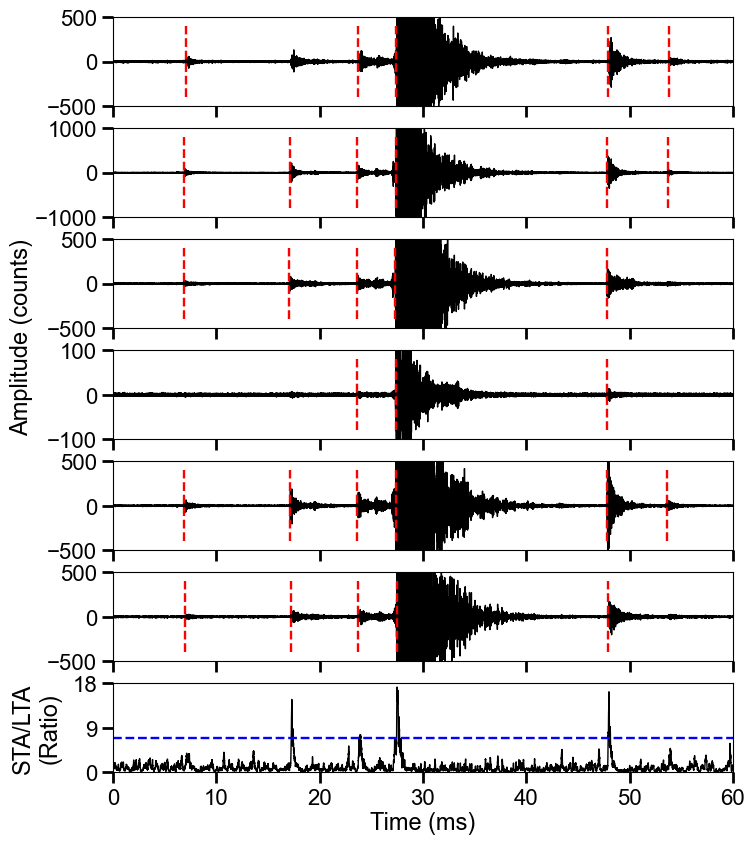

In [9]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec 
from matplotlib.collections import LineCollection
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec 
import scipy.signal as signal 
import os 
import scipy.io as sio
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import MultipleLocator 
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size']  = 8
plt.rcParams['xtick.minor.size']  = 4
plt.rcParams['ytick.major.size']  = 8
plt.rcParams['ytick.minor.size']  = 4

pths =r"C:\Users\Administrator.DESKTOP-Q5G5OQ4\Desktop\AEbagging"

sta_lta1=sio.loadmat(os.path.join(pths,r"manuscript_figure\fig_08\sta-lta\sta_lta1.mat").replace("\\","/"))["sra"][:,0]
sta_lta2=sio.loadmat(os.path.join(pths,r"manuscript_figure\fig_08\sta-lta\sta_lta2.mat").replace("\\","/"))["sra"][:,0]
sta_lta3=sio.loadmat(os.path.join(pths,r"manuscript_figure\fig_08\sta-lta\sta_lta3.mat").replace("\\","/"))["sra"][:,0]
sta_lta4=sio.loadmat(os.path.join(pths,r"manuscript_figure\fig_08\sta-lta\sta_lta4.mat").replace("\\","/"))["sra"][:,0]

path = os.path.join(pths, "pick_example\event_1")
chs=['ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8','ch9','ch10','ch11','ch12'] 
filename="20220315143528.mat" 

toto =np.zeros((3000000,12))
for i in range(len(chs)):
    pth = os.path.join(path, chs[i]+"_"+filename).replace("\\","/")
    data=sio.loadmat(pth)["data"][:,0]
    data=data-np.mean(data)
    # data=data/np.max(data)
    toto[:,i]=data
    phase = toto[430000:610000,:]

path_bagging1 =os.path.join(pths, 'pick_results\event_1')
pts=[]
snrs=[]
for i in range(len(chs)):
    pths = os.path.join(path_bagging1, chs[i]+"_"+filename).replace("\\","/")
    point = sio.loadmat(pths)["data"][:,1]
    snr = sio.loadmat(pths)["data"][:,2]
    pts.append(point)   #12个通道的初至点
    snrs.append(snr)

fig, ax = plt.subplots(7,1,figsize=(8,10),facecolor='w', gridspec_kw={'height_ratios':[1,1,1,1,1,1,1],'hspace':0.25},dpi=100)

ax[0].plot(phase[:,0], lw=1, color="k", alpha=1)
ax[0].vlines(list(pts[0]-430000),  -400, 400, linestyles='dashed', colors='r', lw=1.7)
ax[0].set_xticklabels([])
ax[0].set_xlim(0,180000)
ax[0].set_ylim(-500,500)
# ax[0].set_ylabel('Amplitude',labelpad=-5)

ax[1].plot(phase[:,2], lw=1, color="k", alpha=1)
ax[1].vlines(list(pts[2]-430000),  -800, 800, linestyles='dashed', colors='r', lw=1.7)
ax[1].set_xticklabels([])
ax[1].set_xlim(0,180000)
ax[1].set_ylim(-1000,1000)
# ax[1].set_ylabel('Amplitude',labelpad=-100)

ax[2].plot(phase[:,4], lw=1, color="k", alpha=1)
ax[2].vlines(list(pts[4]-430000),  -400, 400, linestyles='dashed', colors='r', lw=1.7)
ax[2].set_xticklabels([])
ax[2].set_xlim(0,180000)
ax[2].set_ylim(-500,500)
# ax[2].set_ylabel('Amplitude',labelpad=-5)

ax[3].plot(phase[:,6], lw=1, color="k", alpha=1)
ax[3].vlines(list(pts[6]-430000),  -80, 80, linestyles='dashed', colors='r', lw=1.7)
ax[3].set_xticklabels([])
ax[3].set_xlim(0,180000)
ax[3].set_ylim(-100,100)
# ax[3].set_ylabel('Amplitude',labelpad=100)

ax[4].plot(phase[:,8], lw=1, color="k", alpha=1)
ax[4].vlines(list(pts[8]-430000),  -400, 400, linestyles='dashed', colors='r', lw=1.7)
ax[4].set_xticklabels([])
ax[4].set_xlim(0,180000)
ax[4].set_ylim(-500,500)
# ax[4].set_ylabel('Amplitude',labelpad=-5)

ax[5].plot(phase[:,10], lw=1, color="k", alpha=1)
ax[5].vlines(list(pts[10]-430000),  -400, 400, linestyles='dashed', colors='r', lw=1.7)
ax[5].set_xlim(0,180000)
ax[5].set_ylim(-500,500)
# ax[5].set_ylabel('Amplitude',labelpad=-5)
ax[5].set_xticklabels([])

ax[6].plot(sta_lta1, lw=1, color="k", alpha=1)
ax[6].set_xlim(0,180000)
ax[6].set_ylim(0,18)
y_major_locator=MultipleLocator(9)
ax[6].yaxis.set_major_locator(y_major_locator)
ax[6].set_xticks([0, 30000, 60000, 90000, 120000, 150000, 180000], labels=['0', '10', '20', '30', '40', "50", "60"])
ax[6].set_xlabel('Time (ms)',labelpad=2, fontsize=17)
ax[6].hlines(7, 0, 180000, linestyles='dashed', colors='b', lw=1.7)
for ii in range(7):
    ax[ii].tick_params(axis='both', labelsize=16)
    # ax[ii].set_ylabel('Amplitude\ncounts',labelpad=-1, fontsize=17)
    ax[ii].set_xticks([0, 30000, 60000, 90000, 120000, 150000, 180000], labels=['0', '10', '20', '30', '40', "50", "60"])
    ax[ii].set_xticklabels([])
ax[3].set_ylabel('Amplitude (counts)',labelpad=10, y=1.15, fontsize=17)
# ax[2].set_ylabel('Amplitude\ncounts',labelpad=-8)
ax[6].set_ylabel('STA/LTA\n(Ratio)',labelpad=8,fontsize=17)
ax[6].set_xticks([0, 30000, 60000, 90000, 120000, 150000, 180000], labels=['0', '10', '20', '30', '40', "50", "60"])
# plt.savefig("pick_result1.png", dpi=800,bbox_inches="tight")

### STA/LTA data
# b, a = signal.butter(4, [0.01e6*2/3e6, 0.5e6*2/3e6], "bandpass")
# filmdata = signal.filtfilt(b,a, toto[:,10] )
# to= toto[430000:610000,10]
# sio.savemat("one.mat", {"data":to})
# ##信噪比
# phase = filmdata[430000:610000]
# datas = phase[:30000] 
# signals = datas[21044:21044+6000]
# noise = datas[21044-6000:21044] 
# n=np.sqrt(sum(noise**2)/len(noise))
# s=np.sqrt(sum(signals**2)/len(signals))
# snr=20*np.log10(s/n)

Text(0, 0.5, 'STA/LTA\n(Ratio)')

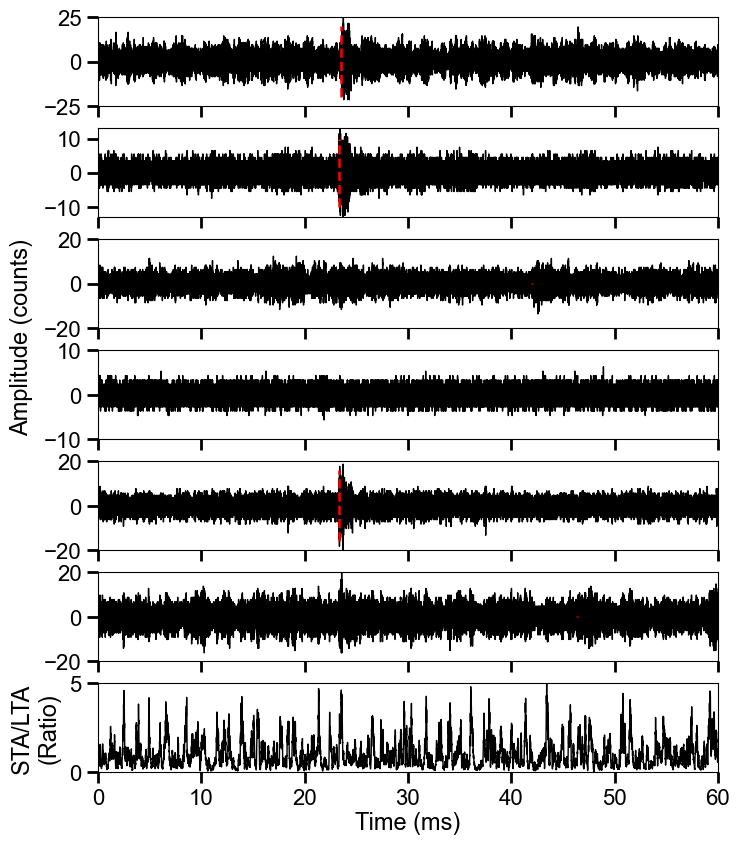

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec 
from matplotlib.collections import LineCollection
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec 
import scipy.signal as signal 
import os 
import scipy.io as sio
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import MultipleLocator 
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size']  = 8
plt.rcParams['xtick.minor.size']  = 4
plt.rcParams['ytick.major.size']  = 8
plt.rcParams['ytick.minor.size']  = 4

pths =r"C:\Users\Administrator.DESKTOP-Q5G5OQ4\Desktop\AEbagging"

sta_lta1=sio.loadmat(os.path.join(pths,r"manuscript_figure\fig_08\sta-lta\sta_lta1.mat").replace("\\","/"))["sra"][:,0]
sta_lta2=sio.loadmat(os.path.join(pths,r"manuscript_figure\fig_08\sta-lta\sta_lta2.mat").replace("\\","/"))["sra"][:,0]
sta_lta3=sio.loadmat(os.path.join(pths,r"manuscript_figure\fig_08\sta-lta\sta_lta3.mat").replace("\\","/"))["sra"][:,0]
sta_lta4=sio.loadmat(os.path.join(pths,r"manuscript_figure\fig_08\sta-lta\sta_lta4.mat").replace("\\","/"))["sra"][:,0]

path = os.path.join(pths, "pick_example\event_2")
chs=['ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8','ch9','ch10','ch11','ch12'] 
filename="20220315143610.mat"  

toto =np.zeros((3000000,12))
for i in range(len(chs)):
    pth = os.path.join(path, chs[i]+"_"+filename).replace("\\","/")
    data=sio.loadmat(pth)["data"][:,0]
    data=data-np.mean(data)
    # data=data/np.max(data)
    toto[:,i]=data
    phase = toto[430000:610000,:]

path_bagging1 =os.path.join(pths, 'pick_results\event_2')
pts=[]
snrs=[]
for i in range(len(chs)):
    pths = os.path.join(path_bagging1, chs[i]+"_"+filename).replace("\\","/")
    point = sio.loadmat(pths)["data"][:,1]
    snr = sio.loadmat(pths)["data"][:,2]
    pts.append(point)   #12个通道的初至点
    snrs.append(snr)


fig, ax = plt.subplots(7,1,figsize=(8,10),facecolor='w', gridspec_kw={'height_ratios':[1,1,1,1,1,1,1],'hspace':0.25},dpi=100)

ax[0].plot(phase[:,0], lw=1.0, color="k", alpha=1)
ax[0].vlines(list(pts[0]-430000),  -20, 20, linestyles='dashed', colors='r', lw=1.8)
ax[0].set_xticklabels([])
ax[0].set_xlim(0,180000)
ax[0].set_ylim(-25,25)
# ax[0].set_ylabel('Amplitude',labelpad=-5)

ax[1].plot(phase[:,2], lw=1.0, color="k", alpha=1)
ax[1].vlines(list(pts[2]-430000),  -10, 10, linestyles='dashed', colors='r', lw=1.8)
ax[1].set_xticklabels([])
ax[1].set_xlim(0,180000)
ax[1].set_ylim(-13,13)
# ax[1].set_ylabel('Amplitude',labelpad=-5)

ax[2].plot(phase[:,4], lw=1.0, color="k", alpha=1)
ax[2].vlines(list(pts[4]-430000),  -0.15, 0.15, linestyles='dashed', colors='r', lw=1.8)
ax[2].set_xticklabels([])
ax[2].set_xlim(0,180000)
ax[2].set_ylim(-20,20)
# ax[2].set_ylabel('Amplitude',labelpad=-5)

ax[3].plot(phase[:,6], lw=1.0, color="k", alpha=1)
ax[3].vlines(list(pts[6]-430000),  -0.15, 0.15, linestyles='dashed', colors='r', lw=1.8)
ax[3].set_xticklabels([])
ax[3].set_xlim(0,180000)
ax[3].set_ylim(-10,10)
# ax[3].set_ylabel('Amplitude',labelpad=-5)

ax[4].plot(phase[:,8], lw=1.0, color="k", alpha=1)
ax[4].vlines(list(pts[8]-430000),  -16, 16, linestyles='dashed', colors='r', lw=1.8)
ax[4].set_xticklabels([])
ax[4].set_xlim(0,180000)
ax[4].set_ylim(-20,20)
# ax[4].set_ylabel('Amplitude',labelpad=-5)

ax[5].plot(phase[:,10], lw=1.0, color="k", alpha=1)
ax[5].vlines(list(pts[10]-430000),  -0.15, 0.15, linestyles='dashed', colors='r', lw=1.8)
ax[5].set_xlim(0,180000)
ax[5].set_ylim(-20,20)
# ax[5].set_ylabel('Amplitude',labelpad=-5)
# ax[5].set_xlabel('Time (ms)',labelpad=-0.5, fontsize=17)
ax[5].set_xticklabels([])

ax[6].plot(sta_lta2, lw=1.0, color="k", alpha=1)
ax[6].set_xlim(0,180000)
ax[6].set_ylim(0,5)
# y_major_locator=MultipleLocator(2.5)
# ax[6].yaxis.set_major_locator(y_major_locator)
ax[6].set_xticks([0, 30000, 60000, 90000, 120000, 150000, 180000], labels=['0', '10', '20', '30', '40', "50", "60"])
ax[6].set_xlabel('Time (ms)',labelpad=2, fontsize=17)
for ii in range(7):
    ax[ii].tick_params(axis='both', labelsize=16)
    # ax[ii].set_ylabel('Amplitude\ncounts',labelpad=-1, fontsize=17)
    ax[ii].set_xticks([0, 30000, 60000, 90000, 120000, 150000, 180000], labels=['0', '10', '20', '30', '40', "50", "60"])
    ax[ii].set_xticklabels([])
ax[6].set_xticks([0, 30000, 60000, 90000, 120000, 150000, 180000], labels=['0', '10', '20', '30', '40', "50", "60"])
ax[3].set_ylabel('Amplitude (counts)',labelpad=8, y=1.15, fontsize=17)
ax[6].set_ylabel('STA/LTA\n(Ratio)',labelpad=6.5,fontsize=17)
# plt.savefig("pick_result2.png", dpi=800, bbox_inches="tight")

### STA/LTA data
# b, a = signal.butter(4, [0.01e6*2/3e6, 0.5e6*2/3e6], "bandpass")
# filmdata = signal.filtfilt(b,a, toto[:,8] )
# to=filmdata[430000:610000,] 
# sio.savemat("two.mat", {"data":to})

#信噪比
# datas = phase[60000:90000,8] 
# plt.plot(datas)
# plt.vlines(9950,-15, 15, linestyles='dashed', colors='r', lw=1.8)
# signals = datas[9950:9950+6000]
# noise = datas[9950-6000:9950] 
# n=np.sqrt(sum(noise**2)/len(noise))
# s=np.sqrt(sum(signals**2)/len(signals))
# snr=20*np.log10(s/n)

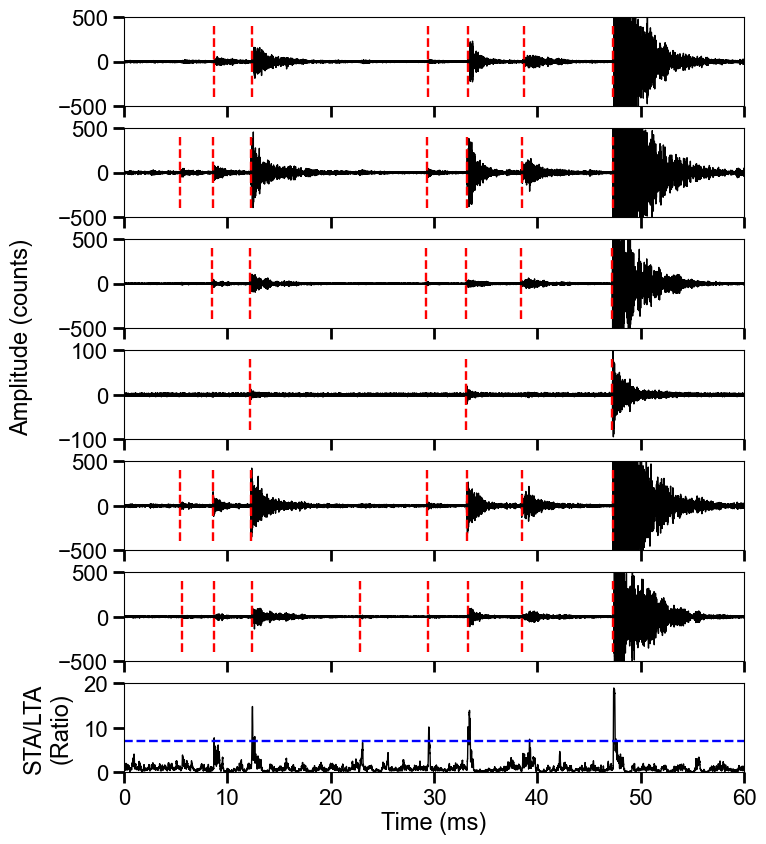

In [11]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec 
from matplotlib.collections import LineCollection
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec 
import scipy.signal as signal 
import os 
import scipy.io as sio
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import MultipleLocator 
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size']  = 8
plt.rcParams['xtick.minor.size']  = 4
plt.rcParams['ytick.major.size']  = 8
plt.rcParams['ytick.minor.size']  = 4

pths =r"C:\Users\Administrator.DESKTOP-Q5G5OQ4\Desktop\AEbagging"

sta_lta1=sio.loadmat(os.path.join(pths,r"manuscript_figure\fig_08\sta-lta\sta_lta1.mat").replace("\\","/"))["sra"][:,0]
sta_lta2=sio.loadmat(os.path.join(pths,r"manuscript_figure\fig_08\sta-lta\sta_lta2.mat").replace("\\","/"))["sra"][:,0]
sta_lta3=sio.loadmat(os.path.join(pths,r"manuscript_figure\fig_08\sta-lta\sta_lta3.mat").replace("\\","/"))["sra"][:,0]
sta_lta4=sio.loadmat(os.path.join(pths,r"manuscript_figure\fig_08\sta-lta\sta_lta4.mat").replace("\\","/"))["sra"][:,0]

path = os.path.join(pths, "pick_example\event_3")
chs=['ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8','ch9','ch10','ch11','ch12'] 
filename="20220315143637.mat"  

n=2460000
toto =np.zeros((3000000,12))
for i in range(len(chs)):
    pth = os.path.join(path, chs[i]+"_"+filename).replace("\\","/")
    data=sio.loadmat(pth)["data"][:,0]
    data=data-np.mean(data)
    # data=data/np.max(data)
    toto[:,i]=data
    phase = toto[n:3000000,:]

path_bagging1 =os.path.join(pths, 'pick_results\event_3')
pts=[]
snrs=[]
for i in range(len(chs)):
    pths = os.path.join(path_bagging1, chs[i]+"_"+filename).replace("\\","/")
    point = sio.loadmat(pths)["data"][:,1]
    snr = sio.loadmat(pths)["data"][:,2]
    pts.append(point)   #12个通道的初至点
    snrs.append(snr)
    

fig, ax = plt.subplots(7,1,figsize=(8,10),facecolor='w', gridspec_kw={'height_ratios':[1,1,1,1,1,1,1],'hspace':0.25},dpi=100)

ax[0].plot(phase[:,0], lw=1.0, color="k", alpha=1)
ax[0].vlines(list(pts[0]-n), -400, 400, linestyles='dashed', colors='r', lw=1.7)
ax[0].set_xticklabels([])
ax[0].set_xlim(0,180000)
ax[0].set_ylim(-500,500)
# ax[0].set_ylabel('Amplitude',labelpad=-5)

ax[1].plot(phase[:,2], lw=1.0, color="k", alpha=1)
ax[1].vlines(list(pts[2]-n),  -400, 400, linestyles='dashed', colors='r', lw=1.7)
ax[1].set_xticklabels([])
ax[1].set_xlim(0,180000)
ax[1].set_ylim(-500,500)
# ax[1].set_ylabel('Amplitude',labelpad=-5)

ax[2].plot(phase[:,4], lw=1.0, color="k", alpha=1)
ax[2].vlines(list(pts[4]-n),  -400, 400, linestyles='dashed', colors='r', lw=1.7)
ax[2].set_xticklabels([])
ax[2].set_xlim(0,180000)
ax[2].set_ylim(-500,500)
# ax[2].set_ylabel('Amplitude',labelpad=-5)

ax[3].plot(phase[:,6], lw=1.0, color="k", alpha=1)
ax[3].vlines(list(pts[6]-n),  -80, 80, linestyles='dashed', colors='r', lw=1.7)
# ax[3].vlines(36000,  -40, 40, linestyles='dashed', colors='r', lw=1.7)
ax[3].set_xticklabels([])
ax[3].set_xlim(0,180000)
ax[3].set_ylim(-100,100)
# ax[3].set_ylabel('Amplitude',labelpad=-5)

ax[4].plot(phase[:,8], lw=1.0, color="k", alpha=1)
ax[4].vlines(list(pts[8]-n),  -400, 400, linestyles='dashed', colors='r', lw=1.7)
ax[4].set_xticklabels([])
ax[4].set_xlim(0,180000)
ax[4].set_ylim(-500,500)
# ax[4].set_ylabel('Amplitude',labelpad=-5)

ax[5].plot(phase[:,10], lw=1.0, color="k", alpha=1)
ax[5].vlines(list(pts[10]-n),  -400, 400, linestyles='dashed', colors='r', lw=1.7)
ax[5].set_xlim(0,180000)
ax[5].set_ylim(-500,500)
# ax[5].set_ylabel('Amplitude',labelpad=-5)
ax[5].set_xticklabels([])

ax[6].plot(sta_lta3, lw=1.0, color="k", alpha=1)
ax[6].set_xlim(0,180000)
ax[6].set_ylim(0,20)
ax[6].set_xticks([0, 30000, 60000, 90000, 120000, 150000, 180000], labels=['0', '10', '20', '30', '40', "50", "60"])
y_major_locator=MultipleLocator(10)
ax[6].yaxis.set_major_locator(y_major_locator)
ax[6].set_xlabel('Time (ms)',labelpad=2, fontsize=17)
ax[6].hlines(7, 0, 180000, linestyles='dashed', colors='b', lw=1.7)
for ii in range(7):
    ax[ii].tick_params(axis='both', labelsize=16)
    # ax[ii].set_ylabel('Amplitude\ncounts',labelpad=-1, fontsize=17)
    ax[ii].set_xticks([0, 30000, 60000, 90000, 120000, 150000, 180000], labels=['0', '10', '20', '30', '40', "50", "60"])
    ax[ii].set_xticklabels([])

ax[3].set_ylabel('Amplitude (counts)',labelpad=18, y=1.15, fontsize=17)
ax[6].set_ylabel('STA/LTA\n(Ratio)',labelpad=8,fontsize=17)
ax[6].set_xticks([0, 30000, 60000, 90000, 120000, 150000, 180000], labels=['0', '10', '20', '30', '40', "50", "60"])
# plt.savefig("pick_result3.png", dpi=800, bbox_inches="tight")

### STA/LTA data
# b, a = signal.butter(4, [0.01e6*2/3e6, 0.5e6*2/3e6], "bandpass")
# filmdata = signal.filtfilt(b,a, toto[:,10] )
# to =filmdata[n:n+180000,] 
# sio.savemat("event_3.mat", {"data":to})

#信噪比
# b, a = signal.butter(4, [0.01e6*2/3e6, 0.5e6*2/3e6], "bandpass")
# filmdata = signal.filtfilt(b,a, toto[:,10] )
# to =filmdata[n:n+180000,] 
# signal = to[16803:16803+6000]
# noise = to[16809-6000:16809] 
# n=np.sqrt(sum(noise**2)/len(noise))
# s=np.sqrt(sum(signal**2)/len(signal))
# snr=20*np.log10(s/n)

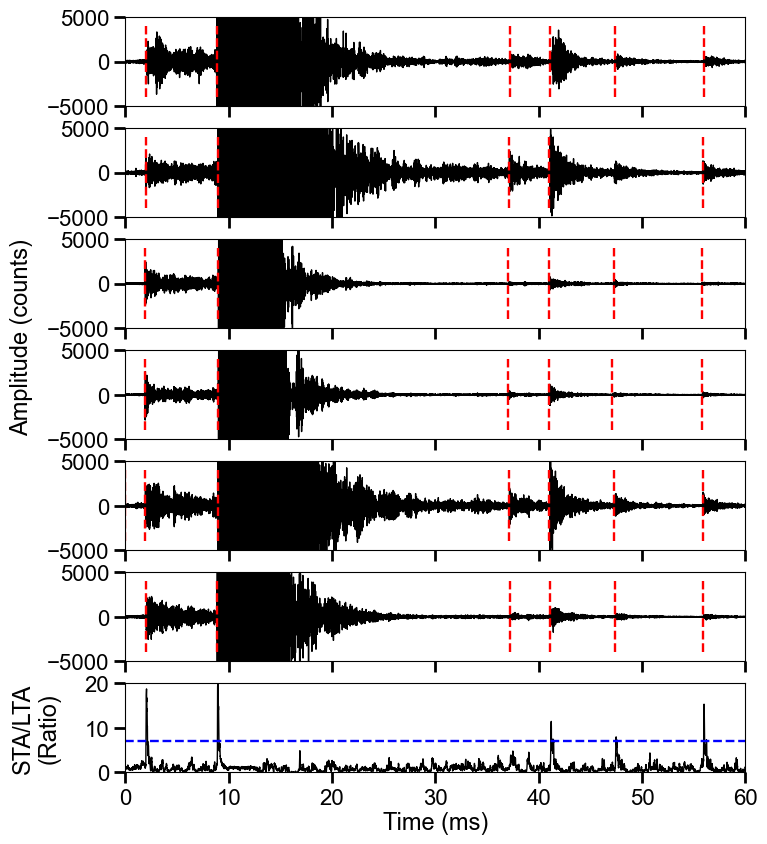

In [12]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec 
from matplotlib.collections import LineCollection
from matplotlib.gridspec import GridSpec
import matplotlib.gridspec as gridspec 
import scipy.signal as signal 
import os 
import scipy.io as sio
from matplotlib.ticker import FuncFormatter
from matplotlib.pyplot import MultipleLocator 
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.major.size']  = 8
plt.rcParams['xtick.minor.size']  = 4
plt.rcParams['ytick.major.size']  = 8
plt.rcParams['ytick.minor.size']  = 4

pths =r"C:\Users\Administrator.DESKTOP-Q5G5OQ4\Desktop\AEbagging"

sta_lta1=sio.loadmat(os.path.join(pths,r"manuscript_figure\fig_08\sta-lta\sta_lta1.mat").replace("\\","/"))["sra"][:,0]
sta_lta2=sio.loadmat(os.path.join(pths,r"manuscript_figure\fig_08\sta-lta\sta_lta2.mat").replace("\\","/"))["sra"][:,0]
sta_lta3=sio.loadmat(os.path.join(pths,r"manuscript_figure\fig_08\sta-lta\sta_lta3.mat").replace("\\","/"))["sra"][:,0]
sta_lta4=sio.loadmat(os.path.join(pths,r"manuscript_figure\fig_08\sta-lta\sta_lta4.mat").replace("\\","/"))["sra"][:,0]

path = os.path.join(pths, "pick_example\event_4")
chs=['ch1','ch2','ch3','ch4','ch5','ch6','ch7','ch8','ch9','ch10','ch11','ch12'] 
filename="20220315143636.mat"  

n=322500
toto =np.zeros((3000000,12))
for i in range(len(chs)):
    pth = os.path.join(path, chs[i]+"_"+filename).replace("\\","/")
    data=sio.loadmat(pth)["data"][:,0]
    data=data-np.mean(data)
    # data=data/np.max(data)
    toto[:,i]=data
    phase = toto[n:1000000,:]

path_bagging1 =os.path.join(pths, 'pick_results\event_4')
pts=[]
snrs=[]
for i in range(len(chs)):
    pths = os.path.join(path_bagging1, chs[i]+"_"+filename).replace("\\","/")
    point = sio.loadmat(pths)["data"][:,1]
    snr = sio.loadmat(pths)["data"][:,2]
    pts.append(point)   #12个通道的初至点
    snrs.append(snr)
    

fig, ax = plt.subplots(7,1,figsize=(8,10),facecolor='w', gridspec_kw={'height_ratios':[1,1,1,1,1,1,1],'hspace':0.25},dpi=100)

ax[0].plot(phase[:,0], lw=1.0, color="k", alpha=1)
ax[0].vlines(list(pts[0]-n), -4000, 4000, linestyles='dashed', colors='r', lw=1.7)
ax[0].set_xticklabels([])
ax[0].set_xlim(0,180000)
ax[0].set_ylim(-5000,5000)
# ax[0].set_ylabel('Amplitude',labelpad=-5)

ax[1].plot(phase[:,2], lw=1.0, color="k", alpha=1)
ax[1].vlines(list(pts[2]-n),  -4000, 4000, linestyles='dashed', colors='r', lw=1.7)
ax[1].set_xticklabels([])
ax[1].set_xlim(0,180000)
ax[1].set_ylim(-5000,5000)
# ax[1].set_ylabel('Amplitude',labelpad=-5)

ax[2].plot(phase[:,4], lw=1.0, color="k", alpha=1)
ax[2].vlines(list(np.sort(pts[4]-n)),  -4000, 4000, linestyles='dashed', colors='r', lw=1.7)
ax[2].set_xticklabels([])
ax[2].set_xlim(0,180000)
ax[2].set_ylim(-5000,5000)
# ax[2].set_ylabel('Amplitude',labelpad=-5)

ax[3].plot(phase[:,6], lw=1.0, color="k", alpha=1)
ax[3].vlines(list(np.sort(pts[6]-n)),  -4000, 4000, linestyles='dashed', colors='r', lw=1.7)
ax[3].set_xticklabels([])
ax[3].set_xlim(0,180000)
ax[3].set_ylim(-5000,5000)
# ax[3].set_ylabel('Amplitude',labelpad=-5)

ax[4].plot(phase[:,8], lw=1.0, color="k", alpha=1)
ax[4].vlines(list(np.sort(pts[8]-n)),  -4000, 4000, linestyles='dashed', colors='r', lw=1.7)
ax[4].set_xticklabels([])
ax[4].set_xlim(0,180000)
ax[4].set_ylim(-5000,5000)
# ax[4].set_ylabel('Amplitude',labelpad=-5)

ax[5].plot(phase[:,10], lw=1.0, color="k", alpha=1)
ax[5].vlines(list(pts[10]-n),  -4000, 4000, linestyles='dashed', colors='r', lw=1.7)
ax[5].set_xlim(0,180000)
ax[5].set_ylim(-5000,5000)
# ax[5].set_ylabel('Amplitude',labelpad=-5)
# ax[5].set_xlabel('Time (ms)',labelpad=-0.5, fontsize=17)
ax[5].set_xticks([0, 30000, 60000, 90000, 120000, 150000, 180000], labels=['0', '10', '20', '30', '40', "50", "60"])
ax[5].set_xticklabels([])


ax[6].plot(sta_lta4, lw=1.0, color="k", alpha=1)
ax[6].set_xlim(0,180000)
ax[6].set_ylim(0,20)
ax[6].set_xticks([0, 30000, 60000, 90000, 120000, 150000, 180000], labels=['0', '10', '20', '30', '40', "50", "60"])
ax[6].set_xlabel('Time (ms)',labelpad=2, fontsize=17)
y_major_locator=MultipleLocator(10)
ax[6].yaxis.set_major_locator(y_major_locator)
ax[6].hlines(7, 0, 180000, linestyles='dashed', colors='b', lw=1.7)

for ii in range(7):
    ax[ii].tick_params(axis='both', labelsize=16)
    # ax[ii].set_ylabel('Amplitude\ncounts',labelpad=-1, fontsize=15)
    ax[ii].set_xticks([0, 30000, 60000, 90000, 120000, 150000, 180000], labels=['0', '10', '20', '30', '40', "50", "60"])
    ax[ii].set_xticklabels([])
    
ax[3].set_ylabel('Amplitude (counts)',labelpad=10, y=1.15, fontsize=17)
ax[6].set_ylabel('STA/LTA\n(Ratio)',labelpad=17,fontsize=17)
ax[6].set_xticks([0, 30000, 60000, 90000, 120000, 150000, 180000], labels=['0', '10', '20', '30', '40', "50", "60"])
# plt.savefig("aftershock2.png", dpi=800, bbox_inches="tight")

### STA/LTA data
# b, a = signal.butter(4, [0.01e6*2/3e6, 0.5e6*2/3e6], "bandpass")
# filmdata = signal.filtfilt(b,a, toto[:,10] )
# to = filmdata[n:n+180000,]
# sio.savemat("event_4.mat", {"data":to})

# datas = phase[0+90000:0+120000,] 
# plt.plot(datas)
# plt.vlines(24213,  -4000, 4000, linestyles='dashed', colors='r', lw=1.7)
# signals = datas[24213:24213+6000]
# noise = datas[24213-6000:24213] 
# n=np.sqrt(sum(noise**2)/len(noise))
# s=np.sqrt(sum(signals**2)/len(signals))
# snr=20*np.log10(s/n)